In [15]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l
import pac.train_ch3 as train_ch3

In [16]:
max_degree=20
n_train,n_test=100,100
true_w=np.zeros(max_degree)
true_w[0:4]=np.array([5,1.2,-3.4,5.6])
#200*20feature lables20*1,w
features=np.random.normal(size=(n_test+n_train,1))
np.random.shuffle(features)
poly_features=np.power(features,np.arange(max_degree).reshape(1,-1))
for i in range(max_degree):
    poly_features[:,i]/=math.gamma(i+1)
labels=np.dot(poly_features,true_w)
labels+=np.random.normal(scale=0.1,size=labels.shape)

In [17]:
true_w,features,poly_features,labels=[torch.tensor(x,dtype=torch.float32) for x in [true_w,features,poly_features,labels]]


In [18]:
def evaluate_loss(net,data_irer,loss):
    metric=d2l.Accumulator(2)
    for X,y in data_irer:
        out=net(X)
        y=y.reshape(out.shape)
        l=loss(out,y)
        metric.add(l.sum(),l.numel())
    return metric[0]/metric[1]


In [19]:
# def train(train_features, test_features, train_labels, test_labels,
# num_epochs=400):
#     loss = nn.MSELoss(reduction='none')
#     input_shape = train_features.shape[-1]
#     # 不设置偏置，因为我们已经在多项式中实现了它
#     net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
#     batch_size = min(10, train_labels.shape[0])
#     train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
#     batch_size)
#     test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
#     batch_size, is_train=False)
#     trainer = torch.optim.SGD(net.parameters(), lr=0.01)
#     animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
#     xlim=[1, num_epochs], ylim=[1e-3, 1e2],
#     legend=['train', 'test'])
#     ch3=train_ch3.ch3()
#     for epoch in range(num_epochs):
#         ch3.train_epoch(net, train_iter, loss, trainer)
#         if epoch == 0 or (epoch + 1) % 20 == 0:
#             animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),evaluate_loss(net, test_iter, loss)))
#     print('weight:', net[0].weight.data.numpy())

In [20]:
def train(train_feature,test_feature,train_label,test_label,num_epoch=400):
    loss=nn.MSELoss(reduction='none')
    inputs_shape=train_feature.shape[-1]
    net=nn.Sequential(
        nn.Linear(inputs_shape,1,bias=False)
    )
    batch_size=min(10,train_label.shape[0])
    train_iter=d2l.load_array((train_feature,train_label.reshape(-1,1)),batch_size)
    test_iter=d2l.load_array((test_feature,test_label.reshape(-1,1)),batch_size)
    trainer=torch.optim.SGD(net.parameters(),lr=0.01)
    animator=d2l.Animator(
        xlabel='Epoch',ylabel='Loss',yscale='log',xlim=[1,num_epoch],ylim=[0.001,100],legend=['Train','Test']
    )
    ch3=train_ch3.ch3()
    for epoch in range(num_epoch):
        ch3.train_epoch_ch3(net,train_iter,loss,trainer)
        if epoch==0 or (epoch+1)%20==0:
            animator.add(epoch+1,(evaluate_loss(net,train_iter,loss),evaluate_loss(net,test_iter,loss)))
    return net[0].weight

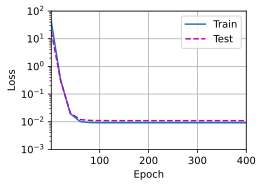

In [21]:
train(poly_features[:n_train, :4], poly_features[n_train:, :4],labels[:n_train], labels[n_train:])

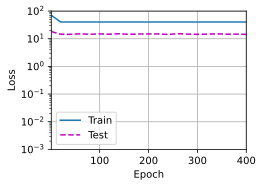

In [22]:
train(poly_features[:n_train, :2], poly_features[n_train:, :2],labels[:n_train], labels[n_train:])

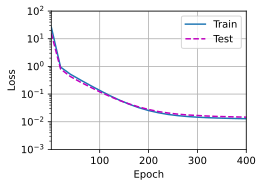

In [25]:
train(poly_features[:n_train, :], poly_features[n_train:, :],labels[:n_train], labels[n_train:])